
# Introduction to Pytorch

In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


Let's take a sneak peek at the some digital logic gates for this exercise.


Given what we know about an MLP's ability to approximate functons that are not linearly seperable we should quite easily be able to solve XOR without backpropogation, and just simply dial in the correct weights and biases.

Before we head down that line of investigation let's go ahead and build what we might need from scratch. This excersise will have you working in two scenarios:


- Scenario one will see us solve the XOR problem with MSE loss, A Recitified Linear Unit in our hidden layer to add non-linearity and an output dimension of 1. \begin{align}
Relu(x) & = max(0,x)
\end{align}  

- Scenario two demonstrates that we can also solve the problem with Binary Cross entropy and simply Sigmoid as our output activation without the need for a Rectified Linear Unit.

\begin{align}
y=\dfrac{1}{1+e^{-x}}
\end{align}


Both scenarios will then be carried forward to our upcoming lab where we'll begin to add some more bells and whistles.


In [5]:
#Digital logic gates

import numpy as np

X = np.array([[0, 0], [0, 1], [1,0], [1, 1]])

gates = {'OR': np.array([0,1,1,1]),
         'AND': np.array([0,0,0,1]),
         'XOR': np.array([0,1,1,0])}

## Conversion to tensors

- Convert the input data above from numpy matrices and vectors to tensors.
- Convert the XOR ground truths to tensor.
- Cast the resultant tensors to float32

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

In [6]:
#Your code here
import torch

data = torch.from_numpy(X).float()
y = torch.from_numpy(gates['XOR']).float()

In [7]:
print(data)
print(y)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([0., 1., 1., 0.])


## Part 2

Let's put aside backpropogation for now and create randomly initialsied weights and biases and construct a feedforward network with the following scenarios (see below for further conditions:

- A single hidden layer with two hidden neurons for the whole batch, and an output dimension of 1.

----

Conditions:

- don't worry about `torch.Variable` for this challenge as we don't need to keep track of gradients etc here. however all operations should be constructed from the ground up with `torch.tensor` etc.

- It's also worth bearing in mind that while Pytorch ordinarily takes care of transposing our weights matrix for our hidden layers, we'll need to do this manually below confirm with those. Given this your hidden dense layer should look like:

\begin{align}
h= g(xW^T + c)
\end{align}


---

Note that your output should be a vector consisting of four predictions



In [8]:
from IPython.display import IFrame
IFrame(src='https://drive.google.com/file/d/12r-yy2lYIpn4v0ULf8jFMDygPyKaNGSj/preview', width=500, height=300)

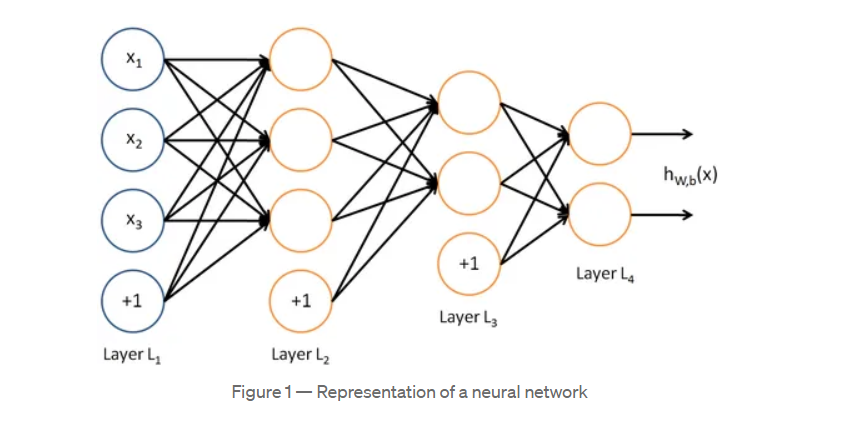


Based on nature, neural networks are the usual representation we make of the brain : neurons interconnected to other neurons which forms a network. A simple information transits in a lot of them before becoming an actual thing, like “move the hand to pick up this pencil”.

The operation of a complete neural network is straightforward : one enter variables as inputs (for example an image if the neural network is supposed to tell what is on an image), and after some calculations, an output is returned (following the first example, giving an image of a cat should return the word “cat”).

Now, you should know that artificial neural network are usually put on columns, so that a neuron of the column n can only be connected to neurons from columns n-1 and n+1. There are few types of networks that use a different architecture, but we will focus on the simplest for now.

Neural networks can usually be read from left to right. Here, the first layer is the layer in which inputs are entered. There are 2 internals layers (called hidden layers) that do some math, and one last layer that contains all the possible outputs. Don’t bother with the “+1”s at the bottom of every columns. It is something called “bias”

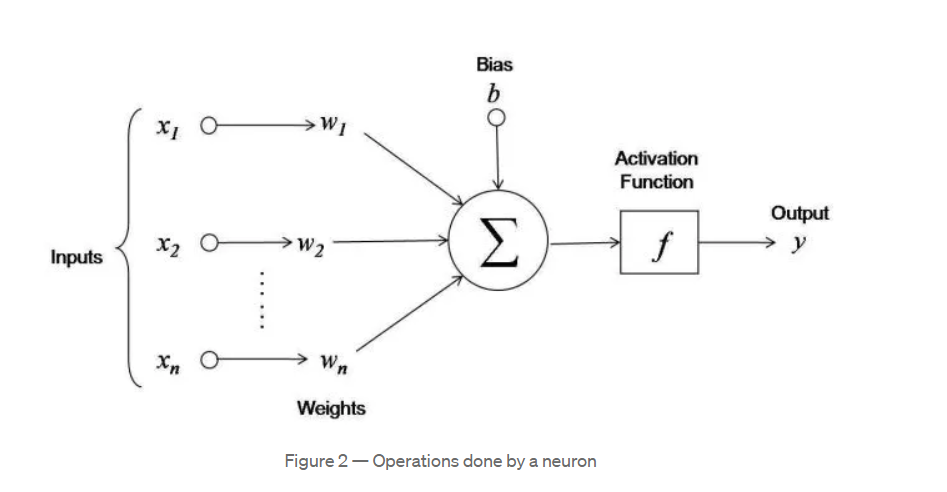

The operations done by each neurons are pretty simple :

First, it adds up the value of every neurons from the previous column it is connected to. On the Figure 2, there are 3 inputs (x1, x2, x3) coming to the neuron, so 3 neurons of the previous column are connected to our neuron.

This value is multiplied, before being added, by another variable called “weight” (w1, w2, w3) which determines the connection between the two neurons. Each connection of neurons has its own weight, and those are the only values that will be modified during the learning process.

Moreover, a bias value may be added to the total value calculated. It is not a value coming from a specific neuron and is chosen before the learning phase, but can be useful for the network.

After all those summations, the neuron finally applies a function called “activation function” to the obtained value.

Torch.randn : Returns a tensor filled with random numbers from a normal distribution with mean 0 and variance 1

torch.matmul :  Matrix product of two tensors.

In [9]:
def add(out, b):
  return out + b

def dense_1(X, W1, b1):
  return add(torch.matmul(X,W1),b1)


#out, in
w1 = torch.randn(2,2)
w2 = torch.randn(2,)


#number of out nodes, one bias per neuron
c = torch.randn(2,)

print(w1)
print(w1.t())


h = torch.relu(dense_1(data,w1.t() , c))
print(type(h))
out = torch.matmul(h, w2)
print(out)


tensor([[-1.1452,  0.8633],
        [-1.3532, -0.0131]])
tensor([[-1.1452, -1.3532],
        [ 0.8633, -0.0131]])
<class 'torch.Tensor'>
tensor([0.0377, 0.0234, 0.0000, 0.0000])


- A single hidden layer with > 2 hidden neurons for the whole batch, and an output dimension of 1.

In [10]:
from IPython.display import IFrame
IFrame(src='https://drive.google.com/file/d/10ZR_eagfu9peGsuMvIywpRh4KGrQV6ed/preview', width=500, height=300)

In [11]:
# hidden neurons = 3
w1 = torch.randn(3,2)
print(w1.shape)
w2 = torch.randn(3,)
print("w1:",w1)
print("w2:",w2)
print("Transpose of w1:",w1.t())
print("Transpose of w2:",w2.t())
#number of out nodes, one bias per neuron
c = torch.randn(3,)


h = torch.relu(dense_1(data,w1.t() , c))
print(h)
out = torch.matmul(h, w2)
print(out)

torch.Size([3, 2])
w1: tensor([[ 0.0159, -0.0038],
        [-0.7914,  2.2353],
        [-0.8686,  0.6397]])
w2: tensor([-0.4121, -1.2305, -0.2893])
Transpose of w1: tensor([[ 0.0159, -0.7914, -0.8686],
        [-0.0038,  2.2353,  0.6397]])
Transpose of w2: tensor([-0.4121, -1.2305, -0.2893])
tensor([[0.0000e+00, 9.6304e-02, 2.3110e-01],
        [0.0000e+00, 2.3316e+00, 8.7078e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.5402e+00, 2.1900e-03]])
tensor([-0.1854, -3.1209,  0.0000, -1.8958])


- Two hidden layers with 6 neuons respectively.

In [12]:
w1 = torch.randn(6,2)
w2 = torch.randn(6,6)
w3 = torch.randn(6,3)

#number of out nodes, one bias per neuron
c1 = torch.randn(6,)
c2 = torch.randn(6,)


h1 = torch.relu(dense_1(data,w1.t() , c1))
h2 = torch.relu(dense_1(h1,w2.t() , c2))

out = torch.matmul(h2, w3)
print(h1)
print(w3)
print(out)



tensor([[0.0000, 1.7090, 0.0857, 1.5308, 0.2115, 0.1675],
        [0.0375, 1.3360, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9344, 0.0000, 0.0000, 0.0993, 0.6610],
        [0.0000, 0.5614, 0.0000, 0.0000, 0.0000, 0.3695]])
tensor([[-0.0138,  0.2784,  0.0277],
        [-0.7195,  1.0179, -0.7274],
        [-1.2106,  1.5124,  0.7701],
        [ 0.5666, -0.6425,  0.5628],
        [ 1.4524, -0.4163, -2.2517],
        [-1.0606, -0.4050, -0.2267]])
tensor([[-0.0199,  0.4004,  0.0398],
        [-0.5483,  0.1677, -0.0765],
        [-0.0079,  0.1590,  0.0158],
        [-0.0806,  0.0609,  0.1004]])


In [13]:
w1.t().shape

torch.Size([2, 6])

Conditions:

don't worry about `torch.Variable` for this challenge as we don't need to keep track of gradients etc here. however all operations should be constructed from the ground up with `torch.tensor` etc.

---

Note that your output should be a vector consisting of four predictions


## Pytorch layers

Construct the above feedforward networks with the `nn.Linear` method! but this time let's wrap our output with a Sigmoid output activation for use with `BCEloss` in our upcoming lab.

This time around the problem can be solved with an output dimension of one too.

In [14]:
#2 hidden
lin1= torch.nn.Linear(2,2)
lin2= torch.nn.Linear(2,1)

hidden = torch.relu(lin1(data))
out = lin2(hidden)

print("2 hidden:",torch.sigmoid(out))


#6 hidden
lin1= torch.nn.Linear(2,6)
lin2= torch.nn.Linear(6,1)

hidden = torch.relu(lin1(data))
out = lin2(hidden)

print("6 hidden:",torch.sigmoid(out))


#multiple hidden
lin1= torch.nn.Linear(2,6)
lin2= torch.nn.Linear(6,2)
lin3= torch.nn.Linear(2,1)

hidden = torch.relu(lin1(data))
hidden2 = torch.relu(lin2(hidden))

out = lin3(hidden2)
+6
print("multiple hidden:",torch.sigmoid(out))
print(np.where(torch.sigmoid(out) > 0.5, 1, 0))

2 hidden: tensor([[0.5160],
        [0.4957],
        [0.4443],
        [0.4243]], grad_fn=<SigmoidBackward0>)
6 hidden: tensor([[0.5760],
        [0.5967],
        [0.5110],
        [0.5470]], grad_fn=<SigmoidBackward0>)
multiple hidden: tensor([[0.4788],
        [0.4784],
        [0.4768],
        [0.4761]], grad_fn=<SigmoidBackward0>)
[[0]
 [0]
 [0]
 [0]]


In [15]:
print(lin1.weight.shape)
print(lin1.bias)


torch.Size([6, 2])
Parameter containing:
tensor([-0.5510,  0.0914,  0.6150, -0.3530, -0.0385, -0.1756],
       requires_grad=True)


In [16]:
lin2.weight.t().shape

torch.Size([6, 2])

## Nerual network class

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fcin = nn.Linear(input_dim, 4)
        self.fcout = nn.Linear(4, num_classes)

    def forward(self, x):
        x = torch.relu(self.fcin(x))
        x = self.fcout(x)
        return x


In [18]:
Xt = torch.from_numpy(X).float()
y = torch.from_numpy(gates['XOR']).float()

Let's take a look at what's going on here:

- Notice on initialization the super constructir is called. This is simply because we're employing `nn.Linear` from `nn.Module` and that particular superclass need to be initalissed in order to become available within our custom class.

- The real flexibility of this methodology lies in the fact that we can define our layers as objects and later chop and change, add lonlinearities etc in the forward pass.

## use the network

Before we discuss further however go ahead and:

- initialize your new network class given what you know about OOP.
- pass in our data.

**Hint**

- within the core code I gave you we require both `input_dim` and `num_classes`.

In [19]:
model = Net(2,1)
outputs = model(Xt)
print(outputs)

tensor([[-0.4377],
        [-0.3273],
        [-0.3273],
        [-0.3114]], grad_fn=<AddmmBackward0>)


##  DataLoaders
Given that let's go ahead and put together a simple loader with Pytorch's  DataLoader class. For now we'll shy away from any need for normalization or augmentation given the simplicity of the problem.

In [20]:
import torch.utils.data as data_utils

train = data_utils.TensorDataset(Xt,y)

train_loader = data_utils.DataLoader(train , batch_size=1 , shuffle=True)
train_loaderb4 = data_utils.DataLoader(train , batch_size=4 , shuffle=True)

In [21]:
print('batch: 1\n')

for batch_idx,(data , labels) in enumerate(train_loader):
  print(f'input {batch_idx}: {data}, target: {labels}')

print('\nbatch: 4\n')

for batch_idx,(data , labels) in enumerate(train_loaderb4):
  print(f'input {batch_idx}: {data}, target: {labels}')

batch: 1

input 0: tensor([[0., 1.]]), target: tensor([1.])
input 1: tensor([[0., 0.]]), target: tensor([0.])
input 2: tensor([[1., 0.]]), target: tensor([1.])
input 3: tensor([[1., 1.]]), target: tensor([0.])

batch: 4

input 0: tensor([[1., 1.],
        [0., 0.],
        [0., 1.],
        [1., 0.]]), target: tensor([0., 0., 1., 1.])


Now looking at our data loaders here it's easy to see how we might be able to go about intercepting out training data and pushing it through a forward pass, where epochs represent a complete forward and backward pass through the entire datset.



## Backpropoagation loop

Before we go ahead and begin to add loss and backpropogation into our training loop - Given the description above go ahead and use the data loader to feed what we have into ourn model.

**Note** Notice I've got you on your feet with the first of you nested loops here.

In [22]:
num_epochs = 700
print(train_loaderb4)
for i in range(0, num_epochs):
  for batch_idx,(data , labels) in enumerate(train_loaderb4):
    outputs = model(data)

print(outputs)



tensor([[-0.3273],
        [-0.4377],
        [-0.3114],
        [-0.3273]], grad_fn=<AddmmBackward0>)


Great! We're getting somewhere but we're not learning anything. You'll recall from your previous sessions that this is where all of the magic comes into play! Let's take this step by step:

- Recall that the first port of call here is to calculate our loss. Note that we're sticking with a simple hidden layer wrappped in a Relu non-linearity and there `nn.MSELoss` will suffice



\begin{align}
MSE =  \frac{{1}}{n}  \sum_{i}^{n} (  y_i-\hat{y_i})^2
\end{align}



It's also not uncommon here to keep track of our current loss as a printout or with tensorboard but let's keep things simple for now.

- Second of all we're going to need to reset the gradients we're keeping a track of with `optimizer.zero_grad()` lest we accmulate. Note here that we're using Adam as it's great out of the box and efficient but there'll be more on optimizers in a later session. For now let's experiment with changing our learning rate achives.

- `loss.backward()` will then calculate our partial derivates for the loss function with regards to all the parameters of our network.


- Last of all `optimizer.step()` then peforms our parameter update given our optmizer of choice and the learning rate that we've dialled in.

##Part 6

Ok ok, now you have the foundations of a training loop and a forward pass let's go ahead and stich it together with what we know conceptually about backpropogating our error. As a refresher we need:

- Our part 4 nested training loop.
- our loss function, `nn.MSELoss` in this scenario.
- reset our gradients with `optimizer.zero_grad()`
-Finally calculate our partial derivates with `loss.backward` and update finally apply our parameter updates with `optimizer.step()`

Over to you. You've got this!


In [23]:
import torch
import torch.nn as nn

class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fcin = nn.Linear(input_dim, 4)
        self.fcout = nn.Linear(4, num_classes)

    def forward(self, x):
        x = torch.relu(self.fcin(x))
        x = self.fcout(x)
        return x

model = Net(2,1)
model.train()

num_epochs = 40000
learning_rate = 0.1

train = data_utils.TensorDataset(Xt,y)
train_loaderb4 = data_utils.DataLoader(train , batch_size=4 , shuffle=True)

criterionCE = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for i in range(0, num_epochs):
  for batch_idx,(data , labels) in enumerate(train_loaderb4):
    outputs = model(data)

    loss = criterionCE(outputs , labels.unsqueeze(1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

pred = model(Xt)
print(outputs)

tensor([[6.6667e-01],
        [6.6667e-01],
        [5.9605e-08],
        [6.6667e-01]], grad_fn=<AddmmBackward0>)


In [24]:

print(np.where(outputs.detach().cpu().numpy() > 0.5, 1, 0))

[[1]
 [1]
 [0]
 [1]]


## Lets try Binary Cross EntropyPart 5

Now let's do all of this with the sigmoid outputs we put together in the last exercise in conjunction with `nn.BCELoss`

\

\begin{align}
\mathcal{L}(\theta)
&= -\frac{1}{n}\sum_{i=1}^n\sum_{j=1}^m y_{ij}\log(p_{ij}) \\
&= -\frac{1}{n}\sum_{i=1}^n \left[y_i \log(p_i) + (1-y_i) \log(1-p_i)\right]
\end{align}

\

At this point you should be more than confident to construct this whole thing by yourself so go forward to be the Deep Learning superheroes you were always meant to be!

In [25]:
import torch
import time
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fcin = nn.Linear(input_dim, 4)
        self.fcout = nn.Linear(4, num_classes)

    def forward(self, x):
        x = torch.relu(self.fcin(x))
        x = torch.sigmoid(self.fcout(x))
        return x

model = Net(2,1)

num_epochs = 7000
learning_rate = 0.01

train = data_utils.TensorDataset(Xt,y)
train_loaderb4 = data_utils.DataLoader(train , batch_size=4 , shuffle=True)

criterionCE = nn.BCELoss()

def run(num_epochs, learning_rate=0.01, bench=True):
  model = Net(2,1)

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  model.train()

  start = time.time()

  for i in range(0, num_epochs):
    for batch_idx,(data , labels) in enumerate(train_loaderb4):
      outputs = model(data)

      loss = criterionCE(outputs , labels.unsqueeze(1).float())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  end = time.time()

  if bench:
    print(f'training completed in {end-start}s')

  return model

model = run(7000)

model.eval()
pred = model(Xt)

training completed in 7.190661907196045s


In [26]:

print(np.where(pred.detach().cpu().numpy() > 0.5, 1, 0))

[[0]
 [1]
 [1]
 [0]]


You did it! Now the real beauty of using a sigmoid output with Binary Scrossentropy here is that we're essentially outputting the probability that we're getting closer to a positive class. To really get a sense of this lets manifets our decison boundary. I've supplied all the code you need here simply plug and play your model ensuring that:

- `pt` is set to `True`
- `output_class` is `False`
- Simply pass your model, data and targets and let's see what we get.

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import torch


def plot_decision(X,y,model,size =(8,8),
                  output_class = False,
                  pt = False, device='cpu',
                  text_pred=False,
                  softmax=False):

  h = .02  # step size in the mesh

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  #gives all the possible combination of x_min, x_max, ymin, ymax
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  fig, ax = plt.subplots(figsize=size)

  if pt:
    model.eval()

    input = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float().to(device)
    outputs = model(input)
    if softmax:
      outputs = outputs.data.max(1, keepdim=True)[1]
    Z = outputs.detach().cpu().numpy()


    Xt = torch.from_numpy(X).to(device).float()
    pred = model(Xt)

    if not softmax:
      pred = np.where(pred.detach().cpu().numpy() > 0.5, 1, 0).flatten()
    else:
      pred  =  pred.detach().cpu().numpy().flatten()


  else:

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

  if output_class:
    Z = Z >0.5

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z)
  ax.axis('on')

  # Plot test points
  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  if text_pred:
    plt.title(f'pred: {pred}')
  plt.show()

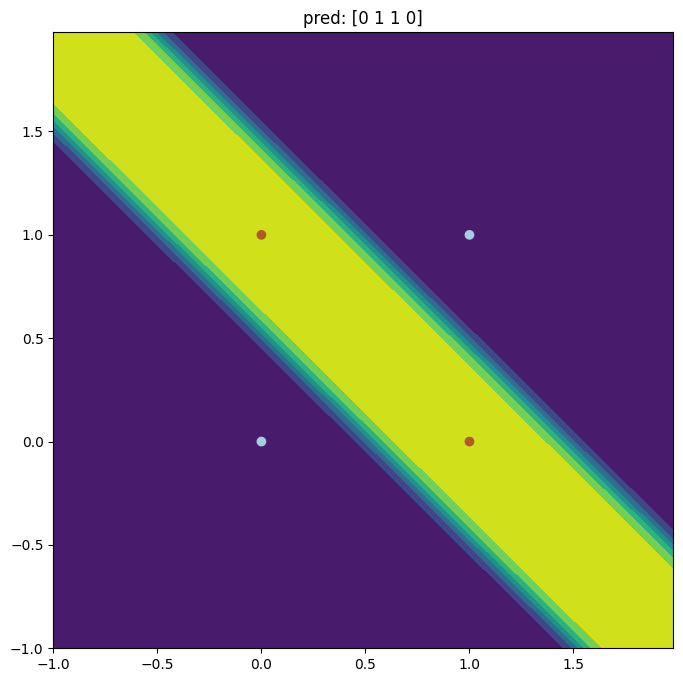

In [28]:
plot_decision(Xt.numpy(),y.numpy(),model,output_class = False, pt = True, text_pred=True)


Notice in my answer I've created a simple function in order to be able to re-use the training loop in conjunction with evaluation. What's missing right now however is a couple of concepts we're yet to discuss.

- Should we need to validate our data during a run with more complex data we're going to need to switch our model to evaluation mode `model.eval()` in order to halt any learning. We'll then need to toggle `model.train()` in order to continue  calculating updating our parameters.

- Now is also a good time to discuss the devices available to us. Run the snippet below and see what you get:

In [29]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  print('using gpu!')
else:
  device = torch.device('cpu')
  print('using cpu!')

#or
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

using gpu!


In [30]:
Xt = Xt.to(device)
y = y.to(device)

#Note that printing the tensor here will see it tagged with Cuda as the device
print(Xt)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], device='cuda:0')


In [31]:
import time
train = data_utils.TensorDataset(Xt,y)
train_loaderb4 = data_utils.DataLoader(train , batch_size=4 , shuffle=True)



def run(num_epochs, learning_rate=0.01, bench=True):
  model = Net(2,1)
  model = model.to(device) #to GPU

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  model.train()

  start = time.time()

  for i in range(0, num_epochs):
    for batch_idx,(data , labels) in enumerate(train_loaderb4):
      outputs = model(data)
      loss = criterionCE(outputs , labels.unsqueeze(1))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  torch.cuda.synchronize()
  end = time.time()

  if bench:
    print(f'training completed in {end-start}s')

  return model

model = run(7000)

model.eval()
pred = model(Xt)

training completed in 11.740869998931885s


Note that we're actually seeing a significant hit in terms of training time here as we're not only dealing with the overhead of moving between devices but we're also dealing with small tensors. Parallel computation really shines the deeper we get and the larger our dataset as we'll see in upcoming sessions.

Fo now go

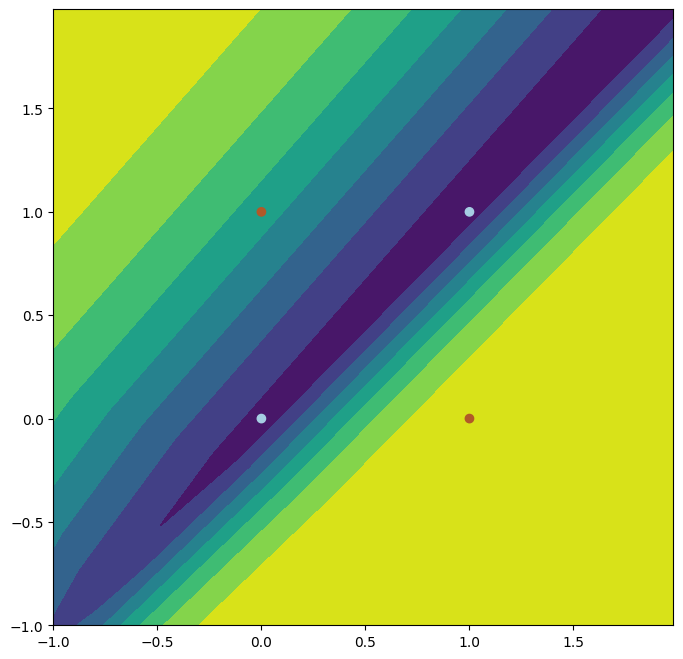

In [32]:
from IPython.display import clear_output
import time


for i in range (30):
  clear_output(wait=True)
  model = run(i, learning_rate=0.1, bench=False)
  model.eval()



  plot_decision(Xt.cpu().numpy(),y.cpu().numpy(),model.to('cpu'),
                  output_class=False,
                  pt = True)
  time.sleep(0.01)

## Bigger dataset

solve a binary classification problem once more with new data. Note a few things here:

- I've already provided you with a make moons example and your respective splits, feel free however to hav a play around with the settings.

- You're tasked here with preparing your data for training, and moving to device should you wish.

- Finally utilize the plot fucntion I've provided for you. Bonus points if you can demonstrate the shift in decision boundary with increased epoch once again. This one looks pretty cool as the boundary bends to encapsulate each moon.


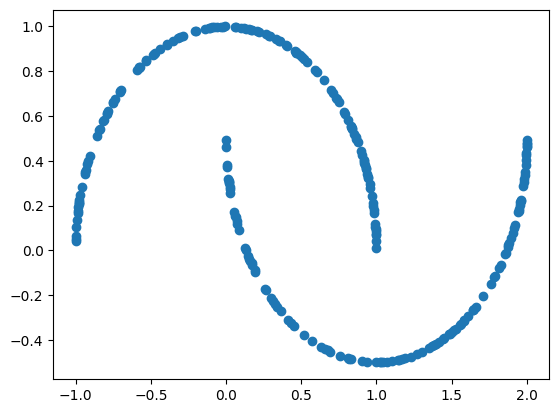

In [33]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
# import mat
X, y = make_moons(n_samples = 1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

plt.scatter(X_test[:,0], X_test[:,1])
plt.show()

### Model

In [34]:
import torch
import time
import torch.nn as nn
import torch.nn.functional as F

X_train = torch.from_numpy(X_train).float().to(device) #data
y_train = torch.from_numpy(y_train).float().to(device) #labels

class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fcin = nn.Linear(input_dim, 64)
        self.fcout = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.fcin(x))
        x = torch.sigmoid(self.fcout(x))
        return x



### Training loop

In [35]:

train = data_utils.TensorDataset(X_train,y_train)
train_loader = data_utils.DataLoader(train , batch_size=64 , shuffle=True)

criterionCE = nn.BCELoss()

def run(num_epochs, learning_rate=0.01, bench=True):
  model = Net(2,1)
  model = model.to(device)

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  model.train()

  start = time.time()

  for i in range(0, num_epochs):
    for batch_idx,(data , labels) in enumerate(train_loader):
      data = data.to(device)
      labels = labels.to(device)

      outputs = model(data)

      loss = criterionCE(outputs , labels.unsqueeze(1))
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  end = time.time()

  if bench:
    print(f'training completed in {end-start}s')

  return model

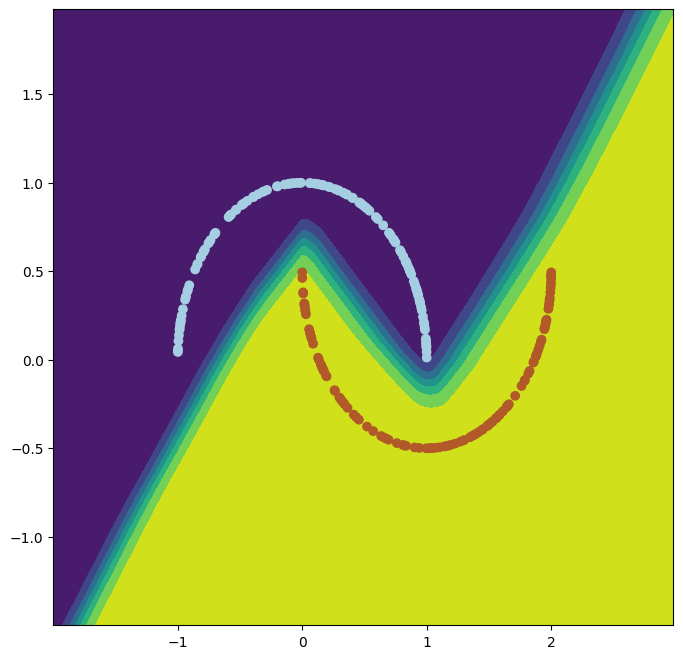

In [36]:
from IPython.display import clear_output
import time

for i in range (1,30):
  clear_output(wait=True)
  model = run(i, learning_rate=0.01,bench=False)
  plot_decision(X_test,y_test,model, output_class=False, pt = True, device='cuda')
  time.sleep(0.2)

# Challenge

Now this is where we test your investigative skills. You have everything you need to begin to deduce how to piece together more complex scenarios so let's step it up a little here.

Here I've provided you with an arbitrary number of blobs. You're tasked given what you know about the output of our networks so far to create something a little different. Hints, and clues are as follows:

\

- Recall that we've been using a sigmoid output `torch.sigmoid` with an output dimension of 1, giving us a probability that we're looking at our positive class. This time around we'll need a softmax output
\
\
\begin{align}
{Softmax}(x_{i}) = \frac{\exp(x_i)}{\sum_j \exp(x_j)}
\end{align}
\
Where we're hoping to receive an output in the shape of **(batch size, number of classes)**. Recall from your previous sessions that the predictions for each class here sum to 1, where we're hoping to squeeze a the closest match to our target class to the highest probability in the given output.
\
In short, the number of classes in your expected output shape is a big old clue as to the confifuration of your network's output.

- Note also that we're going to be falling back on `nn.CrossEntropyLoss()` as our loss here and - as a hint towards how your network should look - A softmax activation is included and therefore does not need to be included in your network.

- Once again finish up by plotting the result and bonus points for decision boundary evolution. Note importantly here however that `softmax` in `plot_decision` should be toggled to `True`. I've done all the legwork for you in the function and we'll discuss what's going on after the boundaries are successfully manifested.

- Last of all note that this time our labels do not need to be  unsqueezed.

Over to you!

### Model

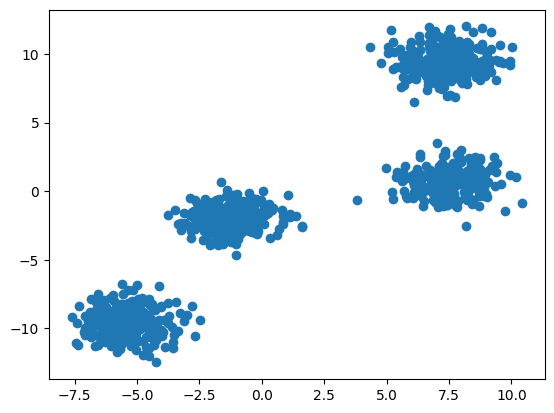

In [37]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, random_state=8, centers=4)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(2, 32)
        self.layer2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 1)  # Output layer for regression

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output(x)
        return x

model = SimpleNN()

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



### Training and Evaluation

Epoch 1/50, Loss: 1.6970067669947941
Epoch 2/50, Loss: 1.320147305727005
Epoch 3/50, Loss: 1.0685973763465881
Epoch 4/50, Loss: 0.806203426172336
Epoch 5/50, Loss: 0.4914117194712162
Epoch 6/50, Loss: 0.25190512649714947
Epoch 7/50, Loss: 0.11168607192424436
Epoch 8/50, Loss: 0.05721339940403899
Epoch 9/50, Loss: 0.037575861400303744
Epoch 10/50, Loss: 0.025481615487175684
Epoch 11/50, Loss: 0.0186751156191652
Epoch 12/50, Loss: 0.01453481880404676
Epoch 13/50, Loss: 0.011200717630951354
Epoch 14/50, Loss: 0.008865479030646384
Epoch 15/50, Loss: 0.007408597137934218
Epoch 16/50, Loss: 0.007282225007656962
Epoch 17/50, Loss: 0.006943474902072921
Epoch 18/50, Loss: 0.006300500477664173
Epoch 19/50, Loss: 0.005971087860719611
Epoch 20/50, Loss: 0.005655928980559111
Epoch 21/50, Loss: 0.0065794447242903216
Epoch 22/50, Loss: 0.005906734198409443
Epoch 23/50, Loss: 0.006025534210493788
Epoch 24/50, Loss: 0.0054026439126270516
Epoch 25/50, Loss: 0.005304092424921691
Epoch 26/50, Loss: 0.0054

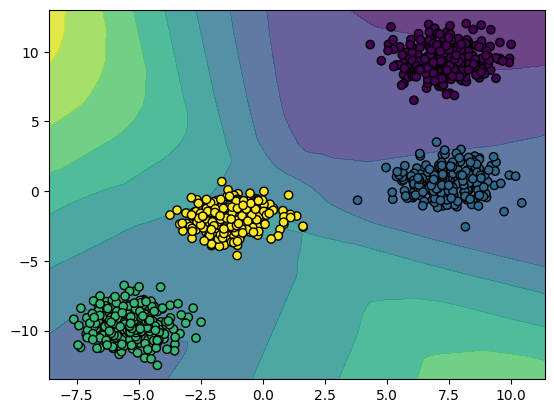

In [39]:
# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


# Evaluate the model
model.eval()
with torch.no_grad():
    total_loss = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
print(f'Test Loss: {total_loss/len(test_loader)}')

# Visualization of decision boundaries
import matplotlib.pyplot as plt
import numpy as np

# Create a grid of points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# Convert grid to tensor and get predictions
grid_tensor = torch.tensor(grid, dtype=torch.float32)
with torch.no_grad():
    Z = model(grid_tensor).numpy().reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap='viridis')
plt.show()


# NEW TRIAL SO WE CAN SEE IN REAL TIME

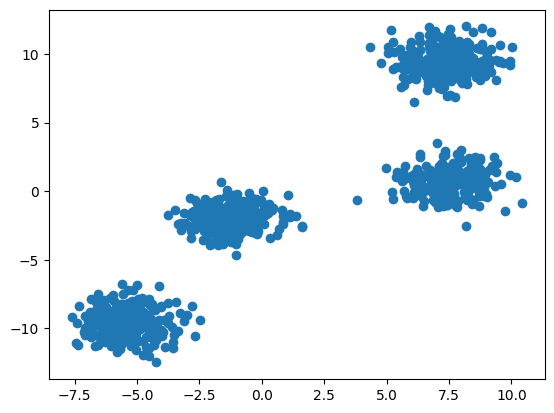

In [40]:
# new code using the code on top

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, random_state=8, centers=4)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

import torch
import time
import torch.nn as nn



X_train = torch.from_numpy(X_train).float().to(device)
y_train = torch.from_numpy(y_train).float().to(device)


class Net(nn.Module):

    def __init__(self, input_dim, num_classes):
        super(Net, self).__init__()
        self.fcin = nn.Linear(input_dim, 8)
        self.fcout = nn.Linear(8, num_classes)

    def forward(self, x):
        x = torch.relu(self.fcin(x))
        x = self.fcout(x)
        return x

# TRAINGING CODE

In [41]:
# training loop
train = data_utils.TensorDataset(X_train,y_train)
train_loader = data_utils.DataLoader(train , batch_size=64 , shuffle=True)

criterionCE = nn.CrossEntropyLoss()

def run(num_epochs, learning_rate=0.01, bench=True):
  model = Net(2,4)
  model = model.to(device)

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  model.train()

  start = time.time()

  for i in range(0, num_epochs):
    for batch_idx,(data , labels) in enumerate(train_loader):
      data = data.to(device)
      labels = labels.to(device)
      labels = labels.to(torch.int64)
      outputs = model(data)

      loss = criterionCE(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  end = time.time()

  if bench:
    print(f'training completed in {end-start}s')

  return model

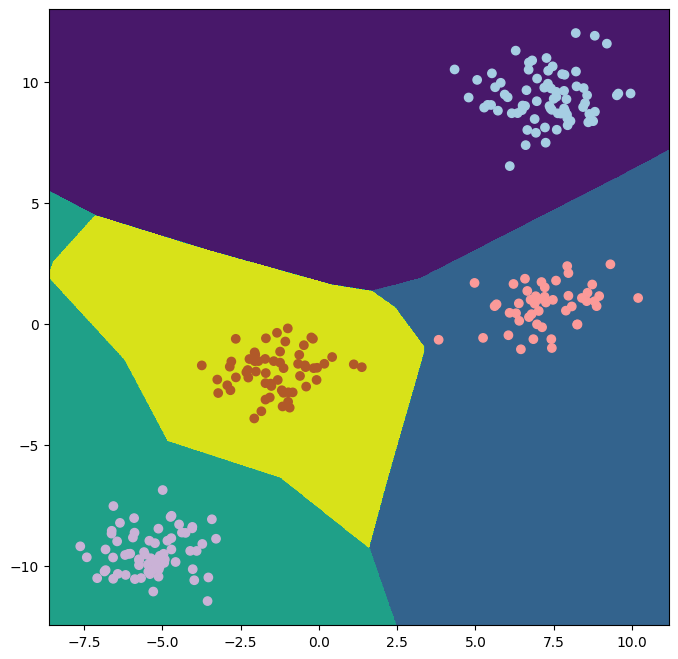

In [42]:


from IPython.display import clear_output
import time

for i in range (30):
  clear_output(wait=True)
  model = run(i, learning_rate=0.01,bench=False)
  plot_decision(X_test,y_test,model, softmax = True, pt = True, device='cuda')
  time.sleep(0.2)